# Intro to Cell Annotation Schema
## AnnData limitations
<img width="898" alt="image" src="https://github.com/user-attachments/assets/e2263028-fb23-4dda-a231-65ee1434b5e6" />

Additional metadata about annotations is typically stored in a spreadsheet published as supplementary material.  This is often not in-sync with h5ad files available for the same publication.  It would be much better if we could store this information in the h5ad file itself.

## CAS Solution
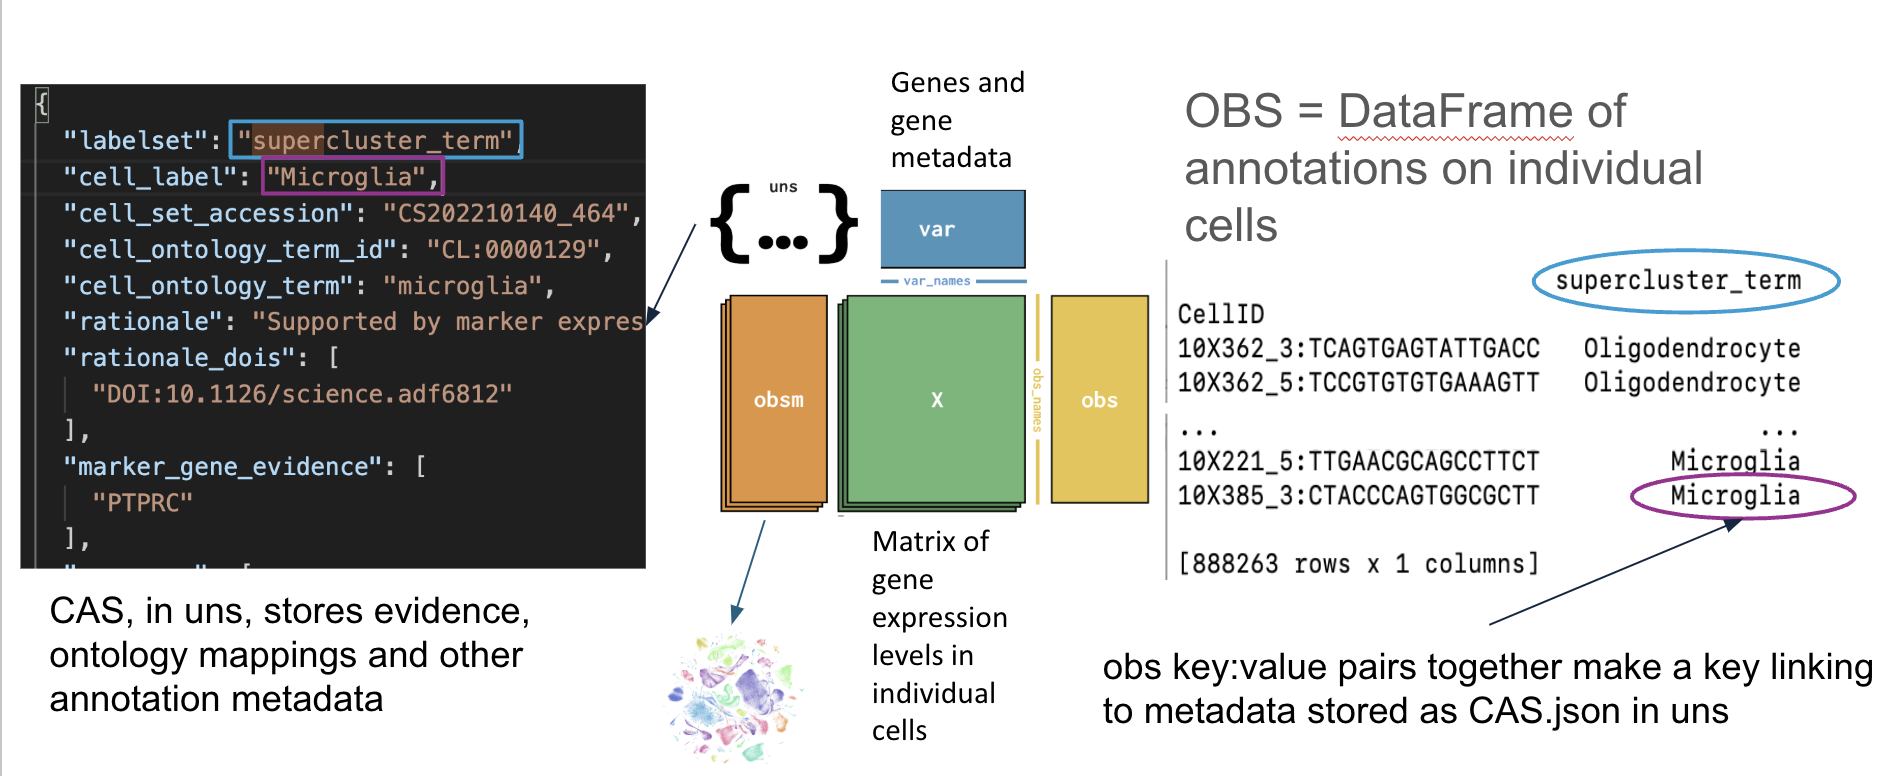

CAS offers a compact, non-redundant solution to storing annotation metadata in h5ad files.

CAS-tools is a python library that makes it easy to generate CAS JSON, manipulate it, merge it into h5ad files and generate DataFrame reports.

## Starting point 1:  h5ad file with embedded CAS

The Cellular Semantics group at the Sanger hosts a number of pre-rolled CAS 'taxonomies' for Brain-related datasets.  These can be browsed at the [Cellular Semantics Taxonomy Catalog](https://cellular-semantics.sanger.ac.uk/tdt/catalog).

For demo perposes we will focus on an h5ad file of Cerebellar glutamatergic neurons (Class: 29 CB Glut) from 

Yao, Zizhen, Cindy T. J. van Velthoven, Michael Kunst, Meng Zhang, Delissa McMillen, Changkyu Lee, Won Jung, et al. 2023. “A High-Resolution Transcriptomic and Spatial Atlas of Cell Types in the Whole Mouse Brain.” Nature 624 (7991): 317–32. https://doi.org/10.1038/s41586-023-06812-z

This can also be viewed on the [Allen Brain Cell Atlas](https://knowledge.brain-map.org/abcatlas)


In [35]:
# Pulling the h5ad file

!wget -N http://cellular-semantics.cog.sanger.ac.uk/public/merged_CS20230722_CLAS_29.h5ad

--2025-01-16 11:52:32--  http://cellular-semantics.cog.sanger.ac.uk/public/merged_CS20230722_CLAS_29.h5ad
Resolving cellular-semantics.cog.sanger.ac.uk (cellular-semantics.cog.sanger.ac.uk)... 172.27.51.2, 172.27.51.129, 172.27.51.1, ...
Connecting to cellular-semantics.cog.sanger.ac.uk (cellular-semantics.cog.sanger.ac.uk)|172.27.51.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cellular-semantics.cog.sanger.ac.uk/public/merged_CS20230722_CLAS_29.h5ad [following]
--2025-01-16 11:52:32--  https://cellular-semantics.cog.sanger.ac.uk/public/merged_CS20230722_CLAS_29.h5ad
Connecting to cellular-semantics.cog.sanger.ac.uk (cellular-semantics.cog.sanger.ac.uk)|172.27.51.2|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘merged_CS20230722_CLAS_29.h5ad’ not modified on server. Omitting download.



In [27]:
import anndata as ad

CB_glut = ad.read_h5ad('merged_CS20230722_CLAS_29.h5ad', backed="r")


In [28]:
CB_glut.obs.columns

Index(['cell_barcode', 'library_label', 'tissue', 'tissue_ontology_term_id',
       'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster',
       'organism', 'disease', 'assay'],
      dtype='object')

In [29]:
CB_glut.obs[0:5]

,cell_barcode,library_label,tissue,tissue_ontology_term_id,neurotransmitter,class,subclass,supertype,cluster,organism,disease,assay
cell_label,,,,,,,,,,,,
AAACCCAAGAACAAGG-472_A05,AAACCCAAGAACAAGG,L8TX_201217_01_G07,Cerebellum,UBERON:0002037,Glut,29 CB Glut,314 CB Granule Glut,1155 CB Granule Glut_2,5201 CB Granule Glut_2,Mus musculus,normal,10x 3' v2
AAACCCAAGAATCCCT-473_A06,AAACCCAAGAATCCCT,L8TX_201217_01_A08,Cerebellum,UBERON:0002037,Glut,29 CB Glut,314 CB Granule Glut,1155 CB Granule Glut_2,5201 CB Granule Glut_2,Mus musculus,normal,10x 3' v3
AAACCCAAGACTACCT-225_A01,AAACCCAAGACTACCT,L8TX_200227_01_F10,Medulla,UBERON:0001896,Glut,29 CB Glut,314 CB Granule Glut,1154 CB Granule Glut_1,5197 CB Granule Glut_1,Mus musculus,normal,10x 3' v2
AAACCCAAGAGCTGAC-231.2_B01,AAACCCAAGAGCTGAC,L8TX_200306_01_H12,Medulla,UBERON:0001896,Glut,29 CB Glut,314 CB Granule Glut,1154 CB Granule Glut_1,5197 CB Granule Glut_1,Mus musculus,normal,10x 3' v3
AAACCCAAGAGGACTC-478_A02,AAACCCAAGAGGACTC,L8TX_210107_02_H11,Cerebellum,UBERON:0002037,Glut,29 CB Glut,314 CB Granule Glut,1155 CB Granule Glut_2,5201 CB Granule Glut_2,Mus musculus,normal,10x 3' v2


The columns: neurotransmitter, class, subclass, supertype, cluster all contain annotations about the type and properties of individual cells.  These columns are also in the 


In [31]:
# Loading CAS
from cas.reports import get_all_annotations
from cas.file_utils import read_cas_json_file, read_cas_from_anndata
cas = read_cas_from_anndata('./merged_CS20230722_CLAS_29.h5ad')
# We can also load CAS from a preloaded anndata file (better for memory usage)
# cas = read_cas_json_file() ...

In [32]:
# Get metadata about a single annotation
cas.get_all_annotations(labels = [('subclass', '314 CB Granule Glut')])

,labelset,cell_label,cell_set_accession,cell_fullname,cell_ontology_term_id,cell_ontology_term,rationale,rationale_dois,marker_gene_evidence,synonyms,...,author_annotation_fields.neighborhood,author_annotation_fields.subclass.tf.markers.combo,author_annotation_fields.subclass.markers.combo,author_annotation_fields.supertype.markers.combo _within subclass_,author_annotation_fields.supertype.markers.combo,author_annotation_fields.anatomical_annotation,author_annotation_fields.merfish.markers.combo,author_annotation_fields.cluster.TF.markers.combo,author_annotation_fields.cluster.markers.combo _within subclass_,author_annotation_fields.cluster.markers.combo
1,subclass,314 CB Granule Glut,CS20230722_SUBC_314,None,CL:0001031,cerebellar granule cell,None,None,None,None,...,NN-IMN-GC,"Pax6,Neurod2,Etv1","Gabra6,Ror1",None,None,None,None,None,None,None


In [33]:
# View all annotations
cas.get_all_annotations()

,labelset,cell_label,cell_set_accession,cell_fullname,cell_ontology_term_id,cell_ontology_term,rationale,rationale_dois,marker_gene_evidence,synonyms,...,author_annotation_fields.neighborhood,author_annotation_fields.subclass.tf.markers.combo,author_annotation_fields.subclass.markers.combo,author_annotation_fields.supertype.markers.combo _within subclass_,author_annotation_fields.supertype.markers.combo,author_annotation_fields.anatomical_annotation,author_annotation_fields.merfish.markers.combo,author_annotation_fields.cluster.TF.markers.combo,author_annotation_fields.cluster.markers.combo _within subclass_,author_annotation_fields.cluster.markers.combo
0,class,29 CB Glut,CS20230722_CLAS_29,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,None,None,None,None,None
1,subclass,314 CB Granule Glut,CS20230722_SUBC_314,None,CL:0001031,cerebellar granule cell,None,None,None,None,...,NN-IMN-GC,"Pax6,Neurod2,Etv1","Gabra6,Ror1",None,None,None,None,None,None,None
2,subclass,315 DCO UBC Glut,CS20230722_SUBC_315,None,CL:4023161,unipolar brush cell,None,None,None,None,...,NN-IMN-GC,"Eomes,Lmx1a,Klf3","Sln,Lmx1a",None,None,None,None,None,None,None
3,supertype,1154 CB Granule Glut_1,CS20230722_SUPT_1154,None,None,None,None,None,None,None,...,None,None,None,Cntn3,"Gabra6,Lmx1a",None,None,None,None,None
4,supertype,1155 CB Granule Glut_2,CS20230722_SUPT_1155,None,None,None,None,None,None,None,...,None,None,None,Gap43,"Gabra6,Gap43,Rab37",None,None,None,None,None
5,supertype,1156 DCO UBC Glut_1,CS20230722_SUPT_1156,None,None,None,None,None,None,None,...,None,None,None,Sln,"Sln,Lmx1a",None,None,None,None,None
6,cluster,5197 CB Granule Glut_1,CS20230722_CLUS_5197,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,DCO VCO,"Col27a1,Barhl1,St18,Trhde,Spon1,Syt6","Lmx1a,Zic1,St18","Lmx1a,Rnf182","Gabra6,Lmx1a,Rnf182"
7,cluster,5198 CB Granule Glut_1,CS20230722_CLUS_5198,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,DCO VCO,"Svep1,Slc17a7,Chrm2","Pax6,Neurod2,Etv1,Bcl11b",Cntn5,"Gabra6,Cntn5"
8,cluster,5199 CB Granule Glut_1,CS20230722_CLUS_5199,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,DCO VCO,"Eomes,Col27a1,Calb2","Eomes,Lmx1a,Nr2f2,Lin28b",Rgs6,"Cbln3,Tmem132d"
9,cluster,5200 CB Granule Glut_2,CS20230722_CLUS_5200,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,NOD PFL,"Eomes,Svep1,Ntng1,Medag","Eomes,St18,En2,Nr4a2","Gap43,Kcnq5","Gabra6,Gap43,Il1rap"


In [34]:
## CAS also includes general metada about labelsets
import pandas as pd
pd.DataFrame(cas.labelsets)


,name,description,annotation_method,automated_annotation,rank
0,class,The top level of cell type definition in the m...,None,None,3
1,subclass,The coarse level of cell type definition in th...,None,None,2
2,supertype,The second finest level of cell type definitio...,None,None,1
3,cluster,The finest level of cell type definition in th...,None,None,0


In [38]:
import scanpy as sc


In [55]:
CB_glut.obsm['umap']= CB_glut.obsm['X_UMAP'] # Needed to fit scanpy defaults

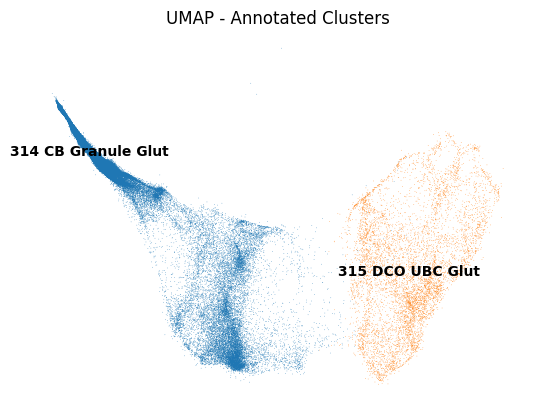

In [56]:


# Visualize the UMAP with annotated clusters
# Assuming your cluster annotations are stored in adata.obs["clusters"] (replace with your key)
sc.pl.umap(
    CB_glut,
    color="subclass",  # Replace "clusters" with the actual key for your annotations
    legend_loc="on data",  # Display legend on the plot
    title="UMAP - Annotated SubClass",
    frameon=False  # No frame around the plot
)


In [45]:
cas.get_all_annotations(labels = [('subclass', '314 CB Granule Glut')])

,labelset,cell_label,cell_set_accession,cell_fullname,cell_ontology_term_id,cell_ontology_term,rationale,rationale_dois,marker_gene_evidence,synonyms,...,author_annotation_fields.neighborhood,author_annotation_fields.subclass.tf.markers.combo,author_annotation_fields.subclass.markers.combo,author_annotation_fields.supertype.markers.combo _within subclass_,author_annotation_fields.supertype.markers.combo,author_annotation_fields.anatomical_annotation,author_annotation_fields.merfish.markers.combo,author_annotation_fields.cluster.TF.markers.combo,author_annotation_fields.cluster.markers.combo _within subclass_,author_annotation_fields.cluster.markers.combo
1,subclass,314 CB Granule Glut,CS20230722_SUBC_314,None,CL:0001031,cerebellar granule cell,None,None,None,None,...,NN-IMN-GC,"Pax6,Neurod2,Etv1","Gabra6,Ror1",None,None,None,None,None,None,None


In [51]:
adata.var


""
gene_identifier
ENSMUSG00000051951
ENSMUSG00000089699
ENSMUSG00000102331
ENSMUSG00000102343
ENSMUSG00000025900
...
ENSMUSG00000095523
ENSMUSG00000095475
ENSMUSG00000094855


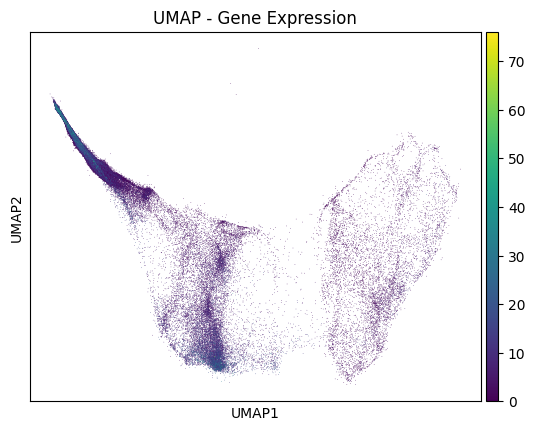

In [53]:
sc.pl.umap(
    adata,
    color=["ENSMUSG00000035305"],  # Replace "Gene_Name" with the gene of interest
    title="UMAP - Gene Expression"
)

In [57]:
adata.var_names


Index(['ENSMUSG00000051951', 'ENSMUSG00000089699', 'ENSMUSG00000102331',
       'ENSMUSG00000102343', 'ENSMUSG00000025900', 'ENSMUSG00000025902',
       'ENSMUSG00000104238', 'ENSMUSG00000104328', 'ENSMUSG00000033845',
       'ENSMUSG00000025903',
       ...
       'ENSMUSG00000096550', 'ENSMUSG00000094172', 'ENSMUSG00000094887',
       'ENSMUSG00000091585', 'ENSMUSG00000095763', 'ENSMUSG00000095523',
       'ENSMUSG00000095475', 'ENSMUSG00000094855', 'ENSMUSG00000095019',
       'ENSMUSG00000095041'],
      dtype='object', name='gene_identifier', length=32285)

In [ ]:
new_ann